# Group 1

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import r2_score

### Q1 a. Plot y = A.sin(wt)

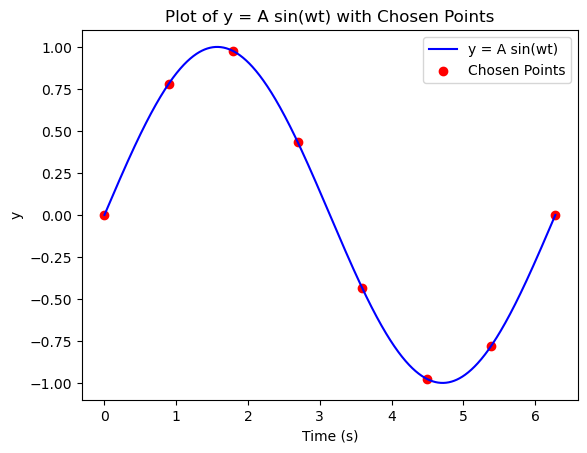

In [66]:
A = 1      # Amplitude
w = 1      # Angular frequency

# Time Period
T = 2 * np.pi / w

# Choose 8 points within one period
t_points = np.linspace(0, T, 8)

y_points = A * np.sin(w * t_points)

t = np.linspace(0, T, 1000)
y = A * np.sin(w * t)

# Plotting
fig, ax1 = plt.subplots()
ax1.plot(t, y, label='y = A sin(wt)', color='blue')
ax1.scatter(t_points, y_points, color='red', label='Chosen Points')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('y')
ax1.tick_params('y')
ax1.legend(loc='upper right')

plt.title('Plot of y = A sin(wt) with Chosen Points')
plt.show()

### b. Use linear and quadratic splines
### c. Plot the spline fitted curve

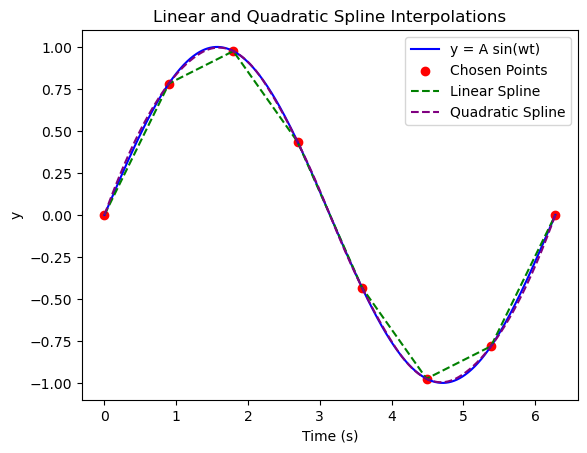

In [67]:
A = 1      # Amplitude
w = 1      # Angular frequency

# Time Period
T = 2 * np.pi / w

# Choose 8 points within one period
t_points = np.linspace(0, T, 8)

y_points = A * np.sin(w * t_points)

t = np.linspace(0, T, 1000)
y = A * np.sin(w * t)

# Linear spline interpolation
linear_interp = interp1d(t_points, y_points, kind='linear')

# Quadratic spline interpolation
quadratic_interp = interp1d(t_points, y_points, kind='quadratic')

# Plotting
fig, ax = plt.subplots()

ax.plot(t, y, label='y = A sin(wt)', color='blue')
ax.scatter(t_points, y_points, color='red', label='Chosen Points')

ax.plot(t, linear_interp(t), label='Linear Spline', linestyle='dashed', color='green')

ax.plot(t, quadratic_interp(t), label='Quadratic Spline', linestyle='dashed', color='purple')

ax.set_xlabel('Time (s)')
ax.set_ylabel('y')
ax.legend()

plt.title('Linear and Quadratic Spline Interpolations')
plt.show()


### d. Evaluate R^2 with increased data points

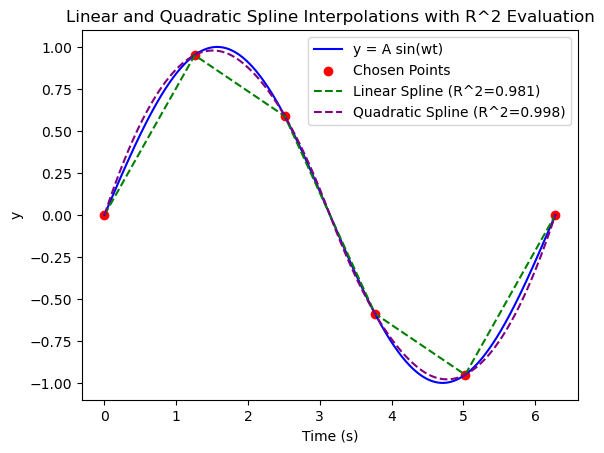

In [68]:
A = 1      # Amplitude
w = 1      # Angular frequency

# Time Period
T = 2 * np.pi / w

# Choose 20 points within one period
t_points = np.linspace(0, T, 6)
inc_t_points = np.linspace(0, T, 20)
y_points = A * np.sin(w * t_points)

t = np.linspace(0, T, 1000)
y = A * np.sin(w * t)

# Linear spline interpolation
linear_interp = interp1d(t_points, y_points, kind='linear')

# Quadratic spline interpolation
quadratic_interp = interp1d(t_points, y_points, kind='quadratic')

# R^2 for linear spline
linear_r2 = r2_score(A * np.sin(w * inc_t_points), linear_interp(inc_t_points))

# R^2 for quadratic spline
quadratic_r2 = r2_score(A * np.sin(w * inc_t_points), quadratic_interp(inc_t_points))

# Plotting
fig, ax = plt.subplots()
ax.plot(t, y, label='y = A sin(wt)', color='blue')
ax.scatter(t_points, y_points, color='red', label='Chosen Points')

ax.plot(t, linear_interp(t), label=f'Linear Spline (R^2={linear_r2:.3f})', linestyle='dashed', color='green')

ax.plot(t, quadratic_interp(t), label=f'Quadratic Spline (R^2={quadratic_r2:.3f})', linestyle='dashed', color='purple')

ax.set_xlabel('Time (s)')
ax.set_ylabel('y')
ax.legend()

plt.title('Linear and Quadratic Spline Interpolations with R^2 Evaluation')
plt.show()


## Q2, Q3

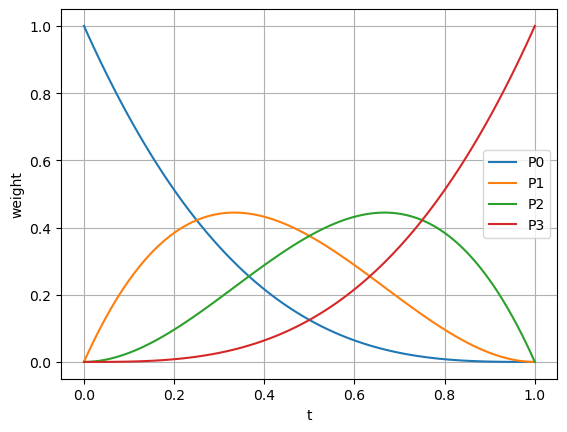

In [69]:
import matplotlib.pyplot as plt
import numpy as np

wt=[np.polynomial.Polynomial([1,-1]),np.polynomial.Polynomial([0,1])]

def wts(new_wt,n,ctr=1):
    global wt
    if ctr<n:
        temp=[np.polynomial.Polynomial([0])]*(len(new_wt)+1)
        for i in range(len(wt)):
            for j in range(len(new_wt)):
                temp[i+j]=np.polynomial.polynomial.polyadd(temp[i+j],(np.polynomial.polynomial.polymul(wt[i],new_wt[j])))
        return wts(temp,n,ctr+1)
    return new_wt

t=np.linspace(0,1,num=100)

def plot(x,wt,n):        #n=order of curve
    wt=wts(wt,n)
    for i in range(n+1):
        plt.plot(x,wt[i][0](x),label='P'+str(i))
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('weight')
    plt.grid()
    plt.show()

plot(t,wt,3)


## Q4

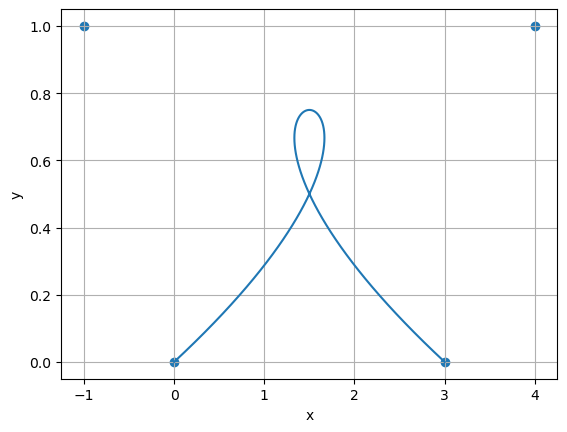

In [70]:
import matplotlib.pyplot as plt
import numpy as np

wt=[np.polynomial.Polynomial([1,-1]),np.polynomial.Polynomial([0,1])]

def wts(new_wt,n,ctr=1):
    global wt
    if ctr<n:
        temp=[np.polynomial.Polynomial([0])]*(len(new_wt)+1)
        for i in range(len(wt)):
            for j in range(len(new_wt)):
                temp[i+j]=np.polynomial.polynomial.polyadd(temp[i+j],(np.polynomial.polynomial.polymul(wt[i],new_wt[j])))
        return wts(temp,n,ctr+1)
    return new_wt

P=np.array([np.array([0,0]),np.array([4,1]),np.array([-1,1]),np.array([3,0])])

t=np.linspace(0,1,num=100)

def plot(x,wt,n):        #n=order of curve
    wt=wts(wt,n)
    new_x=np.zeros(len(x))
    new_y=np.zeros(len(x))
    for i in range(n+1):
        new_x=new_x+P[i][0]*wt[i][0](x)
        new_y=new_y+P[i][1]*wt[i][0](x)
    plt.plot(new_x,new_y)
    plt.scatter(np.transpose(P)[0],np.transpose(P)[1])
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

plot(t,wt,3)
